<a href="https://colab.research.google.com/github/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/notebook/Projeto_Todo_Mundo_Odeia_o_COVID_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
#PROJETO TODO MUNDO ODEIA O COVID
***
***

<img src="https://raw.githubusercontent.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/main/img/Titulo_projeto.png" alt="win" width="800"/>

E aí, carinha que mora logo ali? Passa uma estrela!

Já limpamos os dados, então agora vamos analisar eles.

***
#DADOS
***

Fonte: [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) 

Dados limpos: [Notebook](https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/notebook/Projeto_Todo_Mundo_Odeia_o_COVID_Limpeza.ipynb)

***
#IMPORTAÇÃO DAS BIBLIOTECAS
***

In [1]:
import pandas            as pd
import numpy             as np
from google.colab import files


#bibliotecas de visualização

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn           as sns

import warnings
warnings.filterwarnings('ignore')

***
#CARREGAMENTO DA BASE
***

Vamos pegar a base que limpamos no notebook de [Limpeza](https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/notebook/Projeto_Todo_Mundo_Odeia_o_COVID_Limpeza.ipynb) para realizar a análise

<img src="https://c.tenor.com/AEFMT22qHqkAAAAC/rochelle-everybody-hates-chris.gif" alt="win" width="500"/>


In [2]:
df = pd.read_csv("https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/data/dados_limpos.csv?raw=true")
df.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.994912,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,-0.972789,...,-0.978029,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,-0.935113,...,-1.000000,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.88366

***
#ANÁLISE DOS DADOS
***

Para verificar quantas linhas e colunas possuem em nosso conjunto de dados utilizando o `.shape()`

In [3]:
df.shape

(352, 229)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Columns: 229 entries, AGE_ABOVE65 to ICU
dtypes: float64(225), int64(3), object(1)
memory usage: 629.9+ KB


In [5]:
df.columns

Index(['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
       'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       ...
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'ICU'],
      dtype='object', length=229)

In [6]:
df.describe()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,0.457386,0.380682,0.105114,0.022727,0.090909,0.019886,0.127841,0.042614,0.193182,0.161932,0.832386,0.576854,0.576854,0.576854,0.576854,-1.0,-0.997843,-0.997843,-0.997843,-0.997843,-1.0,-0.958383,-0.958383,-0.958383,-0.958383,-1.0,-0.318320,-0.318320,-0.318320,-0.318320,-1.0,-0.320261,-0.320261,-0.320261,-0.320261,-1.0,-0.945688,-0.945688,-0.945688,-0.945688,...,-0.955163,-0.955163,-1.0,-0.037918,-0.313418,-0.241400,-0.466596,0.109091,0.752578,-0.039036,-0.314467,-0.240459,-0.454741,0.107194,0.753962,0.108306,-0.087145,-0.143454,-0.390422,0.436876,0.896981,-0.313228,-0.500338,-0.383904,-0.504304,-0.077157,0.769737,-0.957856,-0.960855,-0.966863,-0.962066,-0.965233,-0.985365,-0.963091,-0.958921,-0.976421,-0.964390,-0.965725,-0.985390,0.463068
std,0.498890,0.486246,0.307136,0.149245,0.287889,0.139809,0.334388,0.202272,0.395356,0.368913,0.374055,0.134550,0.134550,0.134550,0.134550,0.0,0.024345,0.024345,0.024345,0.024345,0.0,0.114628,0.114628,0.114628,0.114628,0.0,0.032392,0.032392,0.032392,0.032392,0.0,0.089648,0.089648,0.089648,0.089648,0.0,0.044260,0.044260,0.044260,0.044260,...,0.142000,0.142000,0.0,0.265020,0.293299,0.278051,0.221957,0.269461,0.156628,0.269149,0.294161,0.285713,0.235012,0.275171,0.161405,0.235462,0.246015,0.252937,0.233023,0.165714,0.062834,0.186318,0.211692,0.225000,0.209839,0.229507,0.159424,0.111052,0.113712,0.095011,0.110411,0.086132,0.032640,0.106132,0.117561,0.059606,0.095115,0.084306,0.033025,0.499344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.578947,-0.578947,-0.578947,-0.578947,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,

In [7]:
icu = df['ICU'].value_counts()

In [8]:
UTI = {0:"Não foi para UTI", 
         1: "Foi para UTI"}

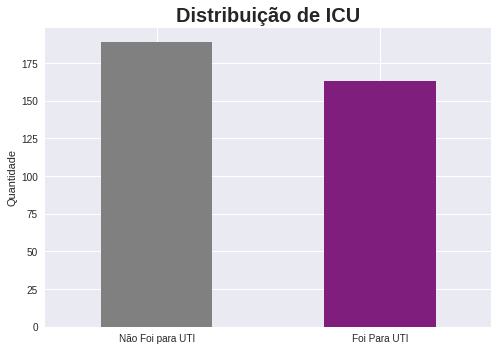

In [37]:
plt.style.use('seaborn')
ax = icu.plot.bar(color=['grey','#801e7d'])
plt.title('Distribuição de ICU',fontdict={'fontsize':20, 'fontweight': 'bold'},)
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
ax.set_xticklabels(['Não Foi para UTI', 'Foi Para UTI'])
plt.show()

In [10]:
df['AGE_ABOVE65'].value_counts(normalize=True)*100

0    54.261364
1    45.738636
Name: AGE_ABOVE65, dtype: float64

In [11]:
idade = {0:"abaixo de 65 anos", 
         1: "acima de 65 anos"}

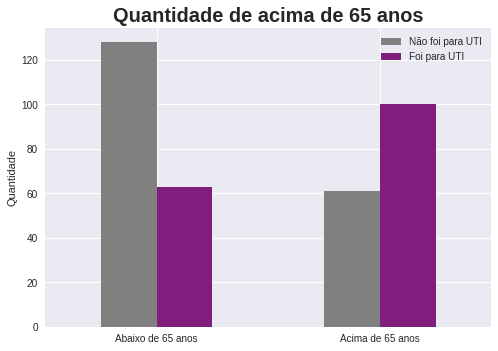

<Figure size 1152x576 with 0 Axes>

In [36]:

age65 = pd.crosstab(df['AGE_ABOVE65'], df['ICU'])
ax = age65.plot.bar(color=['grey','#801e7d'], label =['sim', 'não'])
plt.title('Quantidade de acima de 65 anos',fontdict={'fontsize':20, 'fontweight': 'bold'},)
plt.ylabel('Quantidade')
plt.xlabel('')
plt.xticks(rotation=0)
ax.set_xticklabels(['Abaixo de 65 anos', 'Acima de 65 anos'])
plt.legend(['Não foi para UTI', 'Foi para UTI'])
plt.figure(figsize=(16,8))
plt.show()

In [13]:
df['GENDER'].value_counts(normalize=True)*100

0    61.931818
1    38.068182
Name: GENDER, dtype: float64

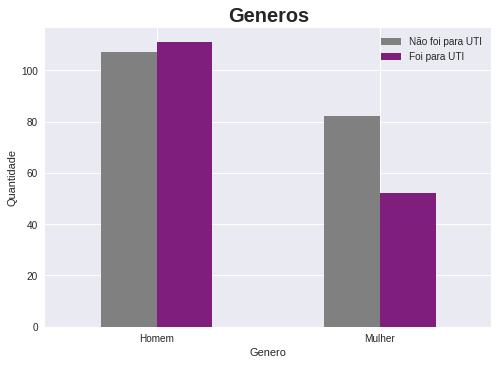

In [40]:
genero = {0:"mulher", 
          1: "homem"}

gender = pd.crosstab(df['GENDER'], df['ICU'])
ax = gender.plot.bar(color=['grey','#801e7d'] )
plt.title('Generos',fontdict={'fontsize':20, 'fontweight': 'bold'},)
plt.ylabel('Quantidade')
plt.xlabel('Genero')
plt.xticks(rotation=0)
ax.set_xticklabels(['Homem', 'Mulher'])
plt.legend(['Não foi para UTI', 'Foi para UTI'])
plt.show()

In [15]:
age_per = pd.crosstab(df['AGE_PERCENTIL'], df['ICU'])

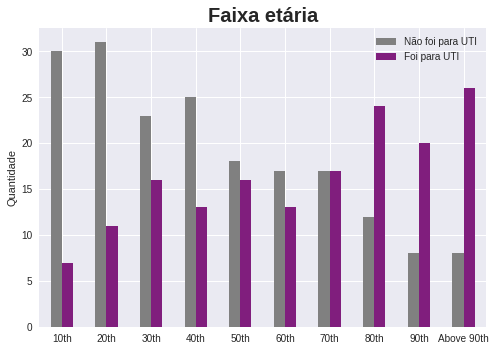

In [39]:
age_per.plot.bar(color=['grey','#801e7d'])
plt.title('Faixa etária',fontdict={'fontsize':20, 'fontweight': 'bold'},)
plt.ylabel('Quantidade')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(['Não foi para UTI', 'Foi para UTI'])
plt.show()

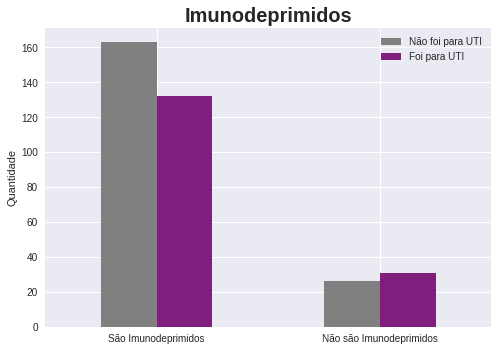

In [38]:
imuno = pd.crosstab(df['IMMUNOCOMPROMISED'], df['ICU'])
ax = imuno.plot.bar(color=['grey','#801e7d'])
plt.title('Imunodeprimidos',fontdict={'fontsize':20, 'fontweight': 'bold'},)
plt.ylabel('Quantidade')
plt.xlabel('')
plt.xticks(rotation=0)
ax.set_xticklabels(['São Imunodeprimidos', 'Não são Imunodeprimidos'])
plt.legend(['Não foi para UTI', 'Foi para UTI'])
plt.show()

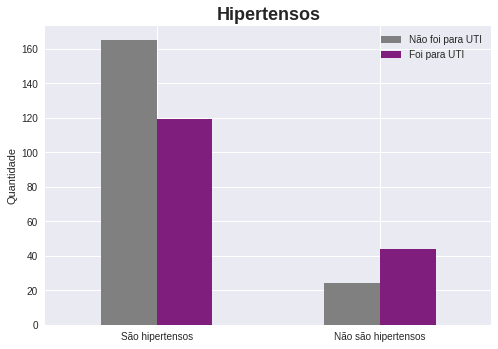

In [20]:
hipertense = pd.crosstab(df['HTN'], df['ICU'])
ax = hipertense.plot.bar(color=['grey','#801e7d'])
plt.title('Hipertensos',fontdict={'fontsize':18, 'fontweight': 'bold'},)
plt.ylabel('Quantidade')
plt.xlabel('')
plt.xticks(rotation=0)
ax.set_xticklabels(['São hipertensos', 'Não são hipertensos'])
plt.legend(['Não foi para UTI', 'Foi para UTI'])
plt.show()

***
#Conclusão da Análise
***

***
#PRÓXIMOS PASSOS
***

Esse foi o notebook da análise exploratória dos dados, para acessar o próximo notebook do [Modelo de Aprendizado de Máquina](https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/notebook/Projeto_Todo_Mundo_Odeia_o_COVID_ML.ipynb) 

Para acessar o notebook da [Limpeza dos Dados](https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/notebook/Projeto_Todo_Mundo_Odeia_o_COVID_Limpeza.ipynb) 
 <br>

Para acessar repositório do Github [JuniortorresMTJ](https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID)


<img src="https://c.tenor.com/Snf7qSUFtuIAAAAC/everybody-hates-chris.gif" alt="win" width="300"/>